## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [2]:
data = pd.read_csv('pitching.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [3]:
data = data.dropna(axis=1, how='any')
print(data.columns)
data.head()

Index(['player_id', 'year', 'stint', 'team_id', 'w', 'l', 'g', 'gs', 'cg',
       'sho', 'sv', 'h', 'er', 'hr', 'bb', 'so', 'bk', 'r'],
      dtype='object')


,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,bechtge01,1871,1,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,1,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,1,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,1,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21


1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

In [4]:
x = list(data['year'].unique())
y = list(data['year'].value_counts())[::-1]

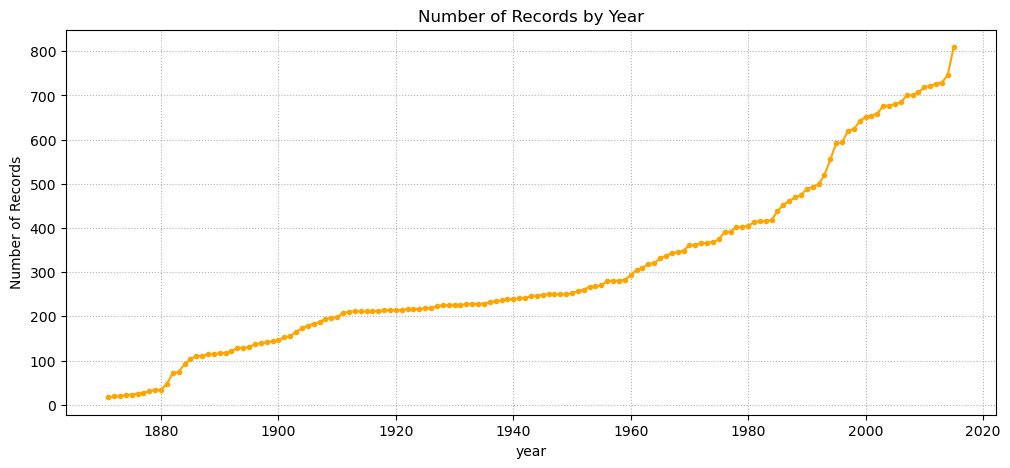

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(x, y, c='orange', marker='o', ms=3)
plt.title('Number of Records by Year')
plt.xlabel('year')
plt.ylabel('Number of Records')
plt.grid(True, linestyle=':')
plt.show()

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [6]:
data = data[data['year'] >= 1980]
print(len(data))
data

21157


,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.6 reset_index()를 통해 재배열하세요.

In [7]:
data = data.reset_index(drop=True)
data

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [8]:
data['w'].value_counts()

w
0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [9]:
data = data[data['w'] != 0]
print(len(data))

15303


1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [10]:
data.loc[data['w'] < 10, 'w'] = 0
data.loc[data['w'] >= 10, 'w'] = 1
data

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,allenne01,1980,1,NYN,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,andujjo01,1980,1,HOU,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,wrighmi01,2015,1,BAL,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,wrighst01,2015,1,BOS,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,yateski01,2015,1,TBA,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,youngch03,2015,1,KCA,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [11]:
data['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [12]:
data = data.drop(columns = ['player_id', 'year', 'team_id'])
data

,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,1,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,1,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,1,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,1,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,1,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,1,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,1,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [13]:
X = data.drop('w', axis=1)
y = data['w']

In [14]:
smote = SMOTE(sampling_strategy='auto', random_state=123)
X_over, y_over = smote.fit_resample(X, y)

1.13 balance가 잘 맞춰졌는지 확인하세요.

In [15]:
new_data = pd.concat([y_over, X_over], axis=1)
print(new_data['w'].value_counts())
new_data

w
0    12589
1    12589
Name: count, dtype: int64


,w,stint,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,0,1,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120
3,0,1,10,59,0,0,0,22,87,40,7,40,79,1,43
4,0,1,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25173,1,1,14,34,34,3,0,0,267,131,24,86,139,0,142
25174,1,1,7,32,32,1,0,0,210,88,21,69,105,0,100
25175,1,1,7,29,29,4,1,0,172,68,16,52,129,1,72
25176,1,1,5,71,0,0,0,6,90,35,6,43,97,2,43


1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

Answer: SMOTE는 데이터 불균형 해결 방법 중 적은 수의 라벨 측에 포함된 데이터 샘플 수를 늘리는 대표적인 오버 샘플링 기법 중 하나로, 샘플링된 데이터에 대하여 k-최근접 이웃을 고른 뒤, 해당 점과 이웃 점들을 선분으로 잇고 이 선분들 위에서 임의의 점을 골라 새로운 샘플로 취급하는 알고리즘입니다.   

Over Sampling의 장점은 데이터를 증가시키기 때문에 정보 손실이 없고 대부분의 경우 언더 샘플링에 비해 높은 분류 정확도를 보입니다.  
단점은 데이터 증가로 인해 계산 시간이 증가할 수 있으며 과적합 가능성이 존재 그리고 노이즈 또는 이상치에 민감합니다.

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

Answer:
- Borderline SMOTE 방법은 Borderline 부분에 대해서만 SMOTE 방식을 사용하는 것입니다. Borderline 을 찾는 것은 임의의 소수 범주의 데이터 한 개에 대해서 주변의 K개 데이터를 탐색하고 그중 다수 범주 데이터의 수를 확인합니다. 이때 다수 범주 데이터의 수가 K와 같을 경우 소수 범주의 데이터를 Noise 관측치라고 하며, 다수 범주 데이터의 수가 K/2 ~ K 에 속할 경우 Danger 관측치, 0 ~ K/2 에 속할 경우 Safe 관측치라고 합니다. 이 중 Danger 관측치에 대해서만 SMOTE를 적용하여 오버 샘플링을 진행합니다.

- ADASYN 방법은 Borderline SMOTE 방법과 비슷하지만 샘플링 개수를 데이터 위치에 따라 다르게 설정하는 것이 차이점입니다. 먼저, 모든 소수 범주 데이터에 대해 주변의 K개의 데이터를 탐색하고 그중 다수 범주 데이터의 비율을 계산합니다. 계산된 각 비율들을 비율의 총합으로 나눠 스케일링을 진행합니다. 그 후 (다수 범주 데이터 수 - 소수 범주 데이터 수) 를 스케일링이 진행된 비율에 곱해주고 반올림된 정수의 값만큼 각 소수 범주 데이터 주변에 SMOTE 방식으로 가상 데이터를 생성합니다. 이 방법은 소수 범주 데이터 주변의 다수 범주 데이터의 수에 따라 유동적으로 생성이 가능하다는 장점이 있습니다.

- GAN (Generative Adversarial Nets) 방법은 생성자와 구분자로 구성되어 있고 모델은 딥러닝을 사용하는 최신 오버 샘플링 기법입니다. 무작위로 노이즈를 생성하고 생성자를 통해 가짜 샘플을 만듭니다. 그 후 구분자에서 진짜 샘플과 가짜 샘플을 판별하고 너무 쉽게 판별될 경우 생성자에게 피드백을 줍니다. 그러면 생성자는 더욱 진짜 샘플과 비슷한 가짜 샘플을 만들어내고 구분자에게 판별을 시킵니다. 이렇게 생성자와 구분자가 서로 경쟁하며 업데이트되고 결국 가짜 샘플은 진짜 샘플과 매우 유사한 형태로 생성되게 됩니다.

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [16]:
rf = RandomForestClassifier()

In [40]:
train_input, test_input, train_target, test_target = train_test_split(
X_over, y_over, test_size=0.2, random_state = 1)

In [18]:
sub_input, val_input, sub_target, val_target = train_test_split(
train_input, train_target, test_size=0.25)

2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

Answer: 검증 세트를 나누지 않고 훈련 세트와 테스트 세트만을 사용하여 하이퍼파라미터 튜닝을 하게 되면, 모델은 테스트 세트로 계속 평가되고 결국 테스트 세트에 잘 맞는 모델이 만들어진다는 문제점이 있다. 테스트 세트로 성능을 올바르게 평가하려면 테스트 세트를 가능한 사용하지 않는 것이 좋다. 테스트 세트를 사용하지 않고 모델의 과대적합 과소적합을 판단하기 위해 훈련 세트를 한 번더 나누어 검증 세트를 생성하고 이 검증 세트로 모델을 평가한다. 그리고 마지막에 테스트 세트에서 최종 점수를 평가한다.

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [19]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [25]:
rs = RandomizedSearchCV(rf, param_grid,
                        n_jobs=-1 ,random_state=42)
rs.fit(train_input, train_target)

print('최적 하이퍼파라미터: ', rs.best_params_)

최적 하이퍼파라미터:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}


2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

1. n_estimators: 앙상블을 구성할 트리의 개수를 지정
2. min_samples_split: 노드를 나누기 위한 최소 샘플 개수
3. max_depth: 트리가 성장할 최대 깊이
4. criterion: 불순도를 지정
5. boostrap: 붓스트랩 샘플을 사용할지 지정
6. min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 수

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [26]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [27]:
gs = GridSearchCV(rf, param_grid, n_jobs=-1)
gs.fit(train_input, train_target)
pred = gs.predict(test_input)
print('최적 하이퍼파라미터: ', gs.best_params_)
print('accuracy_score:', accuracy_score(test_target, pred))

최적 하이퍼파라미터:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
accuracy_score: 0.9630659253375695


2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

Answer: Grid Search는 검증하고 싶은 하이퍼파라미터들의 수치를 정해주고 그 조합을 모두 검증. 설정한 모든 가능한 파라미터 조합을 다 시험해보는 방법. 도메인 지식이 어느정도있어 최적 파라미터가 대략적으로 위치하는 범위를 알때 사용하기 좋음. 최적의 조합을 확실하게 찾을 수 있지만 계산 비용과 시간이 매우 많이 듦  
Random Search는 검증하려는 하이퍼파라미터들의 값 범위를 지정해주면 무작위로 값을 지정해 그 조합을 모두 검증. 계산 비용과 시간을 크게 절약할 수 있지만 최적의 조합을 놓칠 수 있음.

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [57]:
param_grid = {
    'n_estimators': (10, 200),
    'max_depth': (10, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

In [64]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


# 탐색 대상 함수
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    
    # 모델 정의
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=1)
    
    # Perform cross-validation
    
    accuracies = cross_val_score(rf, train_input, train_target, cv=5)
    # Return mean accuracy
    
    return np.mean(accuracies)

In [65]:
# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 

bo=BayesianOptimization(f=rf_cv, pbounds=param_grid, random_state = 1)

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)

bo.maximize(init_points=6, n_iter=10)

# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

# 찾은 파라미터 값 확인
print(bo.max)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9605    | 18.34     | 3.161     | 2.001     | 67.44     |
| 2         | 0.9599    | 12.94     | 1.277     | 3.49      | 75.66     |
| 3         | 0.9597    | 17.94     | 2.616     | 5.354     | 140.2     |
| 4         | 0.9601    | 14.09     | 3.634     | 2.219     | 137.4     |
| 5         | 0.9597    | 18.35     | 2.676     | 3.123     | 47.64     |
| 6         | 0.96      | 26.01     | 3.905     | 4.507     | 141.5     |
| 7         | 0.9603    | 25.94     | 3.567     | 4.161     | 142.2     |
| 8         | 0.9602    | 18.85     | 2.24      | 6.382     | 151.4     |
| 9         | 0.9607    | 26.26     | 3.411     | 4.353     | 142.1     |
| 10        | 0.9594    | 10.42     | 3.424     | 9.719     | 143.4     |
| 11        | 0.9604    | 17.29     | 1.067     | 3.219     | 194.6     |
| 12        | 0.9596    | 29.91     | 

2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [29]:
# Randomized SearchCV로 찾은 최적의 파라미터 셋으로 학습
rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=30, criterion='gini', bootstrap=False)
rf.fit(train_input, train_target)

pred = rf.predict(test_input)
print('accuracy_score:', accuracy_score(test_target, pred))

accuracy_score: 0.9606830818109611


In [30]:
# Grid SearchCV로 찾은 최적의 파라미터 셋으로 학습
rf1 = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=30, criterion='gini', bootstrap=False)
rf1.fit(train_input, train_target)

pred = rf1.predict(test_input)
print('accuracy_score:', accuracy_score(test_target, pred))

accuracy_score: 0.9624702144559174


In [66]:
# Bayesian Optimization로 찾은 최적의 파라미터 셋으로 학습
rf2 = RandomForestClassifier(n_estimators=142, min_samples_split=4, min_samples_leaf=3, max_depth=26)
rf2.fit(train_input, train_target)

pred = rf1.predict(test_input)
print('accuracy_score:', accuracy_score(test_target, pred))

accuracy_score: 0.9918586179507546


### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.

In [68]:
!pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/2b/8d/9f11d0b9ac521febb806e7f30dc5982d0f4f5821217712c59005fbc5c1e3/Mako-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   ---------------------------------------  378.9/380.1 kB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 380.1/3

In [85]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error

In [86]:
def objectiveRF(trial,X_over,y_over):


    train_input, test_input, train_target, test_target = train_test_split(X_over, y_over, test_size=0.2, random_state = 42)
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators',100,3000),
        'max_depth': trial.suggest_int('max_depth',3,30),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 100 ),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100 )
    }

    #학습모델 생성
    model=RandomForestClassifier(**param_grid)
    model.fit(train_input,train_target)

    pred = model.predict(test_input)
    mae = mean_absolute_error(test_target, pred)
    return mae

In [ ]:
# MAE가 최소가 되는 방향으로 학습을 진행
studyRF=optuna.create_study(direction='minimize')

# n_trials 지정
studyRF.optimize(lambda trial: objectiveRF(trial, X_over, y_over), n_trials=100) 

print('study.best_params:', studyRF.best_trial.value)
print('Number of finished trials:', len(studyRF.trials))
print('Best trial:', studyRF.best_trial.params)
print('study.best_params:', studyRF.best_params)

[I 2024-04-09 23:46:26,026] A new study created in memory with name: no-name-9fef89c3-365e-4fa5-92bd-7b8a5570af26
[I 2024-04-09 23:46:42,070] Trial 0 finished with value: 0.0698967434471803 and parameters: {'n_estimators': 888, 'max_depth': 10, 'min_samples_split': 27, 'min_samples_leaf': 39}. Best is trial 0 with value: 0.0698967434471803.
[I 2024-04-09 23:47:19,880] Trial 1 finished with value: 0.0704924543288324 and parameters: {'n_estimators': 2187, 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 40}. Best is trial 0 with value: 0.0698967434471803.
[I 2024-04-09 23:47:33,046] Trial 2 finished with value: 0.06274821286735505 and parameters: {'n_estimators': 694, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 19}. Best is trial 2 with value: 0.06274821286735505.
[I 2024-04-09 23:47:40,232] Trial 3 finished with value: 0.06473391580619539 and parameters: {'n_estimators': 327, 'max_depth': 30, 'min_samples_split': 59, 'min_samples_leaf': 22}. Best is trial 2 

In [ ]:
#파라미터 중요도 시각화
optuna.visualization.plot_param_importances(studyRF)

시간이 없어 결과를 도출하지 못했습니다..